In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
class LinearRegression:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    
    def predict(self, x):
        
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        return self.get_activation(x_1) 
        
    
    def get_activation(self, x):
        
        activation = np.dot(x, self.w)
        return activation
     
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            error = 0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
                
            error = np.square(y - activation).sum()/2.0
                
            self.list_of_errors.append(error)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        e, self.w, error))

In [3]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [4]:
data = pd.read_csv('../JupyterNoteBookScripts/ml_data/housing.data',
                   sep=' +', engine='python', header=None, 
                   names=cols)

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
X = data["LSTAT"].values.reshape(-1,1)

In [11]:
y = data['MEDV'].values

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X)

StandardScaler()

In [15]:
X_std = scaler.transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y , test_size=0.2)

In [19]:
lr = LinearRegression(eta = 0.001, epochs=100) 

In [20]:
lr.fit(X_train, y_train)

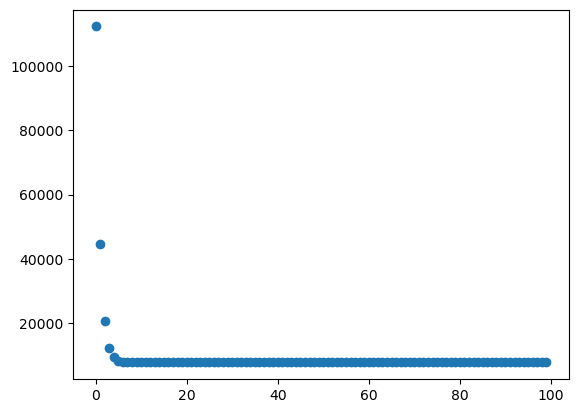

In [21]:
plt.scatter(range(lr.epochs), lr.list_of_errors)

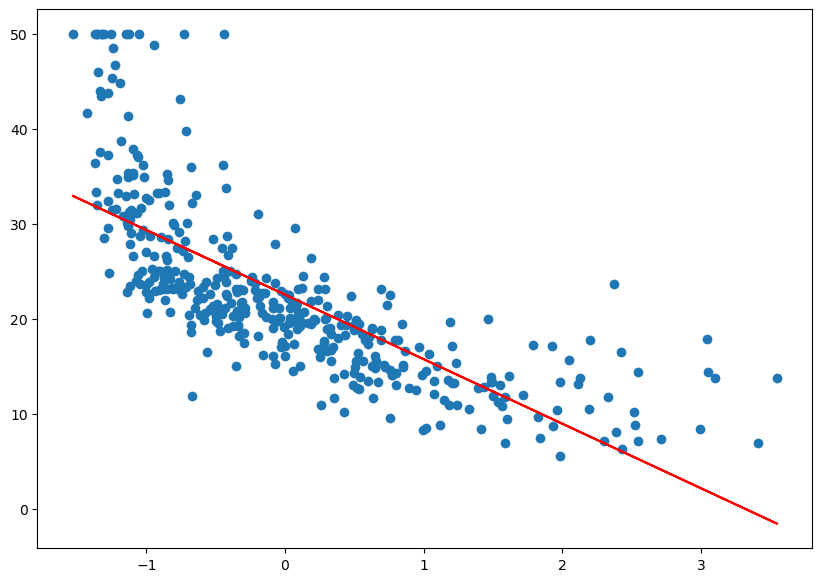

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color='red')

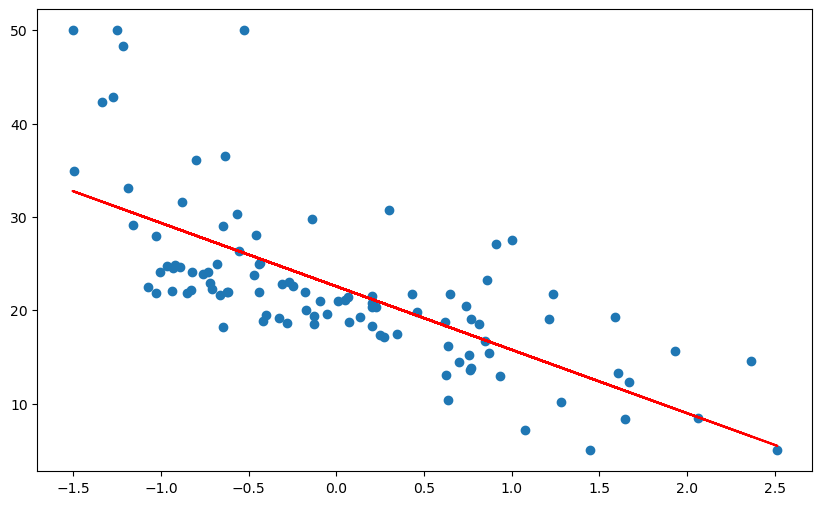

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test)
plt.plot(X_test, lr.predict(X_test), color='red')

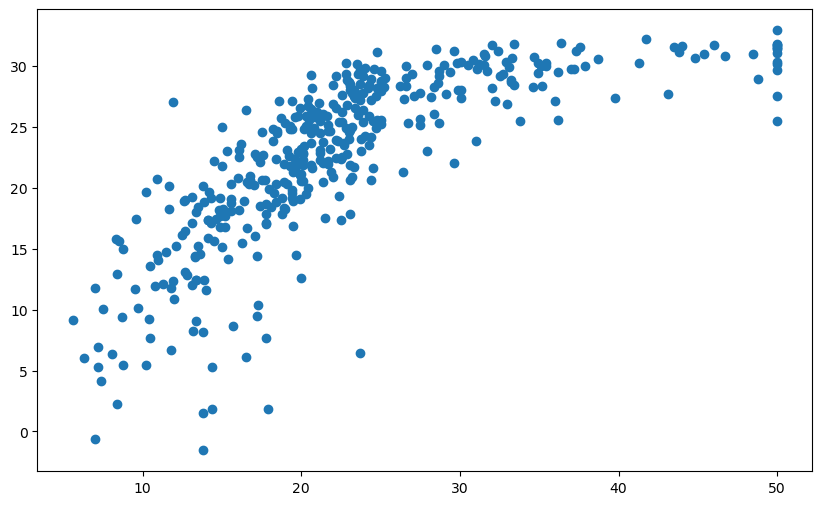

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(y_train, lr.predict(X_train))

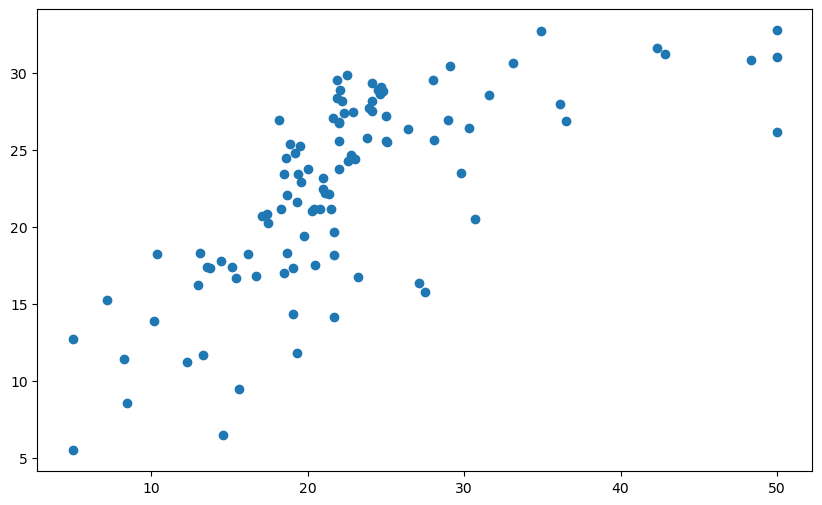

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, lr.predict(X_test))